In [0]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

# figure size
rcParams['figure.figsize'] = (5,5)

In [0]:
def add_ones(X):
    """Append column of ones."""
    n = X.shape[0]
    return np.c_[np.ones(n), X]

In [0]:
def matrix2npower(X, n=1):
    """Takes a matrix [X] and creates a [X^1, X^2,...,X^n] matrix."""
    
    if X.shape[1] > 1:
        raise Warning('X must be a (n x 1)-matrix!')
    if n < 1:
        raise Warning('n must be greater than 0!')
    
    Xt = np.tile(X, (1, n))
    return np.power(Xt, np.arange(1, n+1))

Os parâmetros do modelos são dados por meio de:

$$\beta = [(1-\lambda) X^TX + \lambda I]^{-1}(1-\lambda)X^Ty,~\lambda \in [0,1].$$

In [0]:
def compute_beta(X, y, l=0.):
    """Compute coefficients of regression."""
    return np.dot(np.dot(np.linalg.inv((1-l)*np.dot(X.T,X) + l*np.eye(X.shape[1])), (1-l)*X.T), y)

In [0]:
def error_complexity(X, y, l_grid=np.linspace(0,1,20)):
    """Compute error and complexity for a given penalization factor."""
    
    # error check
    if 0 > l_grid.any() < 1:
        raise ValueError("Lambda must be within [0, 1].")
    
    # length
    n = l_grid.size
    
    E = np.zeros(n)
    C = np.zeros(n)
    for i in range(n):
        
        # penalization factor
        l = l_grid[i]
        
        # compute coeffients
        beta = compute_beta(X, y, l)
        
        # computer error
        error =  np.dot(X, beta) - y
        E[i] = error.T @ error
        
        # complexity
        C[i] = beta.T @ beta
        
    return E, C

In [0]:
# base functions
f = lambda x: x - 0.5

# generating data
n = 40  # number of data points
xs = np.linspace(-1, 1, n) 

# gaussian noise
np.random.seed(10)
noise = np.random.normal(loc=0.0, scale=.25, size=n)

# data
y = (f(xs) + noise).reshape(-1, 1)

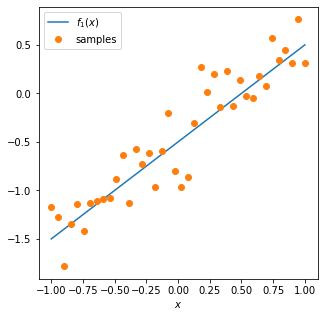

In [7]:
# visualization
plt.figure()
plt.plot(xs, f(xs), label='$f_1(x)$')
plt.plot(xs, y, 'o', label='samples')
plt.xlabel('$x$')
plt.legend()
plt.show()

In [8]:
# estimating coefficients of linear problem
X = add_ones(xs)
print('X = \n', X[:5, :], '\ny = \n', y[:5])

X = 
 [[ 1.         -1.        ]
 [ 1.         -0.94871795]
 [ 1.         -0.8974359 ]
 [ 1.         -0.84615385]
 [ 1.         -0.79487179]] 
y = 
 [[-1.16710337]
 [-1.26989821]
 [-1.78378597]
 [-1.34824981]
 [-1.1395378 ]]


In [0]:
# coefficients
beta = compute_beta(X, y, l=0)

In [10]:
# compute error term
error = np.dot(X, beta) - y
se = error.T @ error
print(se)

[[2.30677261]]


In [0]:
# predictions
x_grid = np.linspace(-1, 1, 100)
predictions = add_ones(x_grid) @ beta

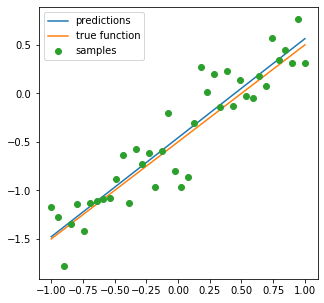

In [12]:
# visualize predictions
plt.figure()
plt.plot(x_grid, predictions, label='predictions')
plt.plot(x_grid, f(x_grid), label='true function')
plt.plot(xs, y, 'o', label='samples')
plt.legend()
plt.show()

In [0]:
# increasing complexity of linear prediction model
n = 30
X = add_ones(matrix2npower(xs.reshape(-1,1), n=n))
beta = compute_beta(X, y, l=0)

In [0]:
# compute error term
error = np.dot(X, beta) - y
se = error.T @ error

In [0]:
# predictions
x_grid = np.linspace(-1, 1, 100)
predictions = add_ones(matrix2npower(x_grid.reshape(-1,1), n=n)) @ beta

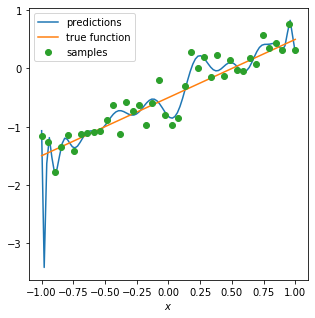

In [16]:
# visualize predictions
plt.figure()
plt.plot(x_grid, predictions, label='predictions')
plt.plot(x_grid, f(x_grid), label='true function')
plt.plot(xs, y, 'o', label='samples')
plt.xlabel('$x$')
plt.legend()
plt.show()

In [0]:
# generate pareto of linear model
X = add_ones(xs)
l_grid = np.linspace(0,.7,20)
E1, C1 = error_complexity(X,y,l_grid)

In [0]:
# generate pareto of polynomial model
n = 5
X = add_ones(matrix2npower(xs.reshape(-1,1), n=n))
E2, C2 = error_complexity(X,y,l_grid)

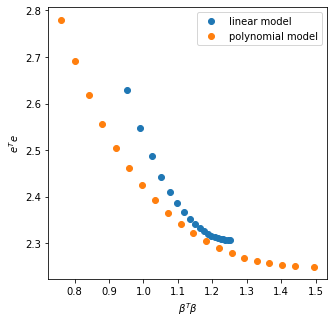

In [19]:
# pareto visualization
plt.figure()
plt.plot(C1, E1, 'o', label='linear model')
plt.plot(C2, E2, 'o', label='polynomial model')
plt.xlabel(r'$\beta^T\beta$')
plt.ylabel(r'$e^Te$')
plt.legend()
plt.show()

In [0]:
# base functions
f = lambda x: np.exp(2*x) - 0.5

# generating data
n = 10  # number of data points
xs = np.linspace(-1, 1, n) 

# gaussian noise
np.random.seed(10)
noise = np.random.normal(loc=0.0, scale=.6, size=n)

# data
y = (f(xs) + noise).reshape(-1, 1)

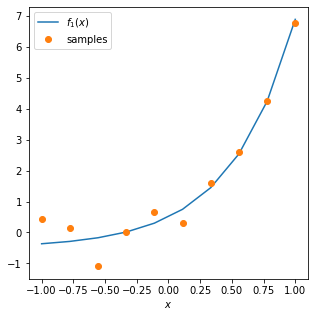

In [21]:
# visualization
plt.figure()
plt.plot(xs, f(xs), label='$f_1(x)$')
plt.plot(xs, y, 'o', label='samples')
plt.xlabel('$x$')
plt.legend()
plt.show()

In [0]:
# increasing complexity of linear prediction model
n = 3
X = add_ones(matrix2npower(xs.reshape(-1,1), n=n))
beta = compute_beta(X, y, l=0)

In [0]:
# predictions
x_grid = np.linspace(-1, 1, 100)
predictions = add_ones(matrix2npower(x_grid.reshape(-1,1), n=n)) @ beta

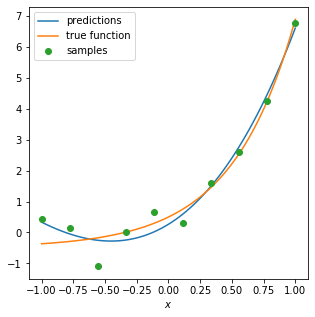

In [24]:
# visualize predictions
plt.figure()
plt.plot(x_grid, predictions, label='predictions')
plt.plot(x_grid, f(x_grid), label='true function')
plt.plot(xs, y, 'o', label='samples')
plt.xlabel('$x$')
plt.legend()
plt.show()